In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [77]:
listostocks = (os.listdir("/home/raflicky/Desktop/NYSE_DATA/1_Hour/Nasdaq_stocks"))

In [186]:
def clean_data(files, path = "/home/raflicky/Desktop/NYSE_DATA/1_Day/Stocks"):
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'OpenInt'], axis = 1)
        df = pd.merge(df,stock_price,how='left',on='Date')
    return df

In [229]:
import random
def next_batch(dataframe, dataframe2, batch_size, features):
    df_size = len(dataframe)
    sample = batch_size / df_size
    upper_bound = int(sample * 100)
    random_point = random.randint(1,100-upper_bound)
    starting_point = int(df_size * (random_point/100))
    ending_point = starting_point + batch_size
    
    data = dataframe.values
    data = data[starting_point-1:ending_point-1]
    data2 = dataframe2.values
    data2 = data2[starting_point-1:ending_point-1]

    X = data[:-1].reshape(batch_size-1,1,features)
    Y = data2[1:].reshape(batch_size-1)
        
    return X, Y

In [245]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [224]:
my_data_frame = clean_data(listostocks)
my_data_frame = my_data_frame.drop(['Date'], axis=1)
my_data_frame = my_data_frame.fillna(0)
my_data_frame_sum = my_data_frame.sum(axis=1)

In [225]:
working_data = my_data_frame.iloc[0:5000]
working_data_sum = my_data_frame_sum.iloc[0:5000]
validate_data = my_data_frame.iloc[5000:]
validate_data_sum = my_data_frame_sum.iloc[5000:]

In [226]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [246]:
trainingX, trainingY = next_batch2(my_x, my_y, 100)
testingX, testingY = next_batch2(my_x, my_y, 100)

In [247]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 100)

In [159]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

In [288]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100))
model.add(Dense(1))

In [ ]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(trainingX, trainingY, epochs=20000, batch_size=50, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

Train on 4999 samples, validate on 4999 samples
Epoch 1/20000
 - 2s - loss: 503.3334 - val_loss: 495.2266
Epoch 2/20000
 - 1s - loss: 490.7586 - val_loss: 486.3357
Epoch 3/20000
 - 1s - loss: 482.4568 - val_loss: 479.0918
Epoch 4/20000
 - 1s - loss: 476.3943 - val_loss: 474.1390
Epoch 5/20000
 - 1s - loss: 472.2726 - val_loss: 470.6639
Epoch 6/20000
 - 1s - loss: 469.2647 - val_loss: 467.7833
Epoch 7/20000
 - 1s - loss: 466.5844 - val_loss: 464.6606
Epoch 8/20000
 - 1s - loss: 460.2055 - val_loss: 460.6809
Epoch 9/20000
 - 1s - loss: 457.0140 - val_loss: 458.1932
Epoch 10/20000
 - 1s - loss: 453.0537 - val_loss: 449.0085
Epoch 11/20000
 - 1s - loss: 447.1290 - val_loss: 445.1194
Epoch 12/20000
 - 1s - loss: 442.6796 - val_loss: 440.8107
Epoch 13/20000
 - 1s - loss: 437.6618 - val_loss: 437.1140
Epoch 14/20000
 - 1s - loss: 434.2826 - val_loss: 437.2522
Epoch 15/20000
 - 1s - loss: 431.1738 - val_loss: 430.7152
Epoch 16/20000
 - 1s - loss: 427.1093 - val_loss: 426.9168
Epoch 17/20000
 -

Epoch 139/20000
 - 1s - loss: 174.8074 - val_loss: 176.2920
Epoch 140/20000
 - 1s - loss: 174.5207 - val_loss: 171.9648
Epoch 141/20000
 - 1s - loss: 172.1285 - val_loss: 170.5146
Epoch 142/20000
 - 1s - loss: 170.1006 - val_loss: 167.3605
Epoch 143/20000
 - 1s - loss: 167.6395 - val_loss: 167.3413
Epoch 144/20000
 - 1s - loss: 166.7163 - val_loss: 164.1014
Epoch 145/20000
 - 1s - loss: 164.6834 - val_loss: 164.8183
Epoch 146/20000
 - 1s - loss: 164.3716 - val_loss: 164.5396
Epoch 147/20000
 - 1s - loss: 163.0573 - val_loss: 168.3630
Epoch 148/20000
 - 1s - loss: 163.9860 - val_loss: 166.4528
Epoch 149/20000
 - 1s - loss: 162.7597 - val_loss: 165.4354
Epoch 150/20000
 - 1s - loss: 161.7918 - val_loss: 159.4190
Epoch 151/20000
 - 1s - loss: 158.3097 - val_loss: 160.7294
Epoch 152/20000
 - 1s - loss: 158.3546 - val_loss: 156.4134
Epoch 153/20000
 - 1s - loss: 155.4450 - val_loss: 156.7499
Epoch 154/20000
 - 1s - loss: 154.5254 - val_loss: 152.9037
Epoch 155/20000
 - 1s - loss: 152.6061 -

Epoch 278/20000
 - 1s - loss: 74.8863 - val_loss: 73.7344
Epoch 279/20000
 - 1s - loss: 74.6312 - val_loss: 72.4814
Epoch 280/20000
 - 1s - loss: 73.6505 - val_loss: 71.8979
Epoch 281/20000
 - 1s - loss: 72.7410 - val_loss: 71.6380
Epoch 282/20000
 - 1s - loss: 72.2638 - val_loss: 69.3952
Epoch 283/20000
 - 1s - loss: 71.3024 - val_loss: 70.9495
Epoch 284/20000
 - 1s - loss: 71.3918 - val_loss: 70.9157
Epoch 285/20000
 - 1s - loss: 72.1165 - val_loss: 69.2436
Epoch 286/20000
 - 1s - loss: 70.9339 - val_loss: 67.6227
Epoch 287/20000
 - 1s - loss: 70.8617 - val_loss: 67.9174
Epoch 288/20000
 - 1s - loss: 70.1274 - val_loss: 69.4958
Epoch 289/20000
 - 1s - loss: 71.1477 - val_loss: 68.8392
Epoch 290/20000
 - 1s - loss: 70.5375 - val_loss: 67.3389
Epoch 291/20000
 - 1s - loss: 70.5801 - val_loss: 68.0611
Epoch 292/20000
 - 1s - loss: 69.9420 - val_loss: 69.2658
Epoch 293/20000
 - 1s - loss: 71.0916 - val_loss: 68.0263
Epoch 294/20000
 - 1s - loss: 69.6321 - val_loss: 67.2704
Epoch 295/2000

 - 1s - loss: 52.6066 - val_loss: 50.8521
Epoch 420/20000
 - 1s - loss: 50.7270 - val_loss: 48.4618
Epoch 421/20000
 - 1s - loss: 50.8267 - val_loss: 47.3370
Epoch 422/20000
 - 1s - loss: 49.3042 - val_loss: 47.5654
Epoch 423/20000
 - 1s - loss: 48.8024 - val_loss: 44.9459
Epoch 424/20000
 - 1s - loss: 49.1576 - val_loss: 45.4336
Epoch 425/20000
 - 1s - loss: 48.0046 - val_loss: 45.7960
Epoch 426/20000
 - 1s - loss: 47.8661 - val_loss: 45.4049
Epoch 427/20000
 - 1s - loss: 47.9545 - val_loss: 45.5498
Epoch 428/20000
 - 1s - loss: 47.9763 - val_loss: 44.9467
Epoch 429/20000
 - 1s - loss: 48.4410 - val_loss: 45.8550
Epoch 430/20000
 - 1s - loss: 48.3353 - val_loss: 46.5046
Epoch 431/20000
 - 1s - loss: 48.6686 - val_loss: 47.3703
Epoch 432/20000
 - 1s - loss: 49.3805 - val_loss: 48.2146
Epoch 433/20000
 - 1s - loss: 50.1891 - val_loss: 46.3305
Epoch 434/20000
 - 1s - loss: 48.9048 - val_loss: 47.5486
Epoch 435/20000
 - 1s - loss: 48.3087 - val_loss: 47.4899
Epoch 436/20000
 - 1s - loss: 

In [266]:
yhat = model.predict(validateX)

In [267]:
np.savetxt("yhat.csv", yhat.flatten(), delimiter=",")
np.savetxt("testingX.csv", validateX.flatten(), delimiter=",")
np.savetxt("testingY.csv", validateY.flatten(), delimiter=",")

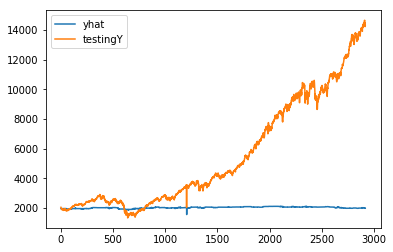

In [268]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()

In [282]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = validateY[i]
    prediction2 = yhat[i + 1]
    real_value2 = validateY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    growth.append(initial_capital)

10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000.353688571984
10000.353688571984
10024.76901866803
10024.76901866803
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10008.901841902618
10020.229564059098
10020.229564059098
10020.229564059098
10020.229564059098
10020.229564059098
10020.229564059098
10020.229564059098
10020.2

IndexError: index 2917 is out of bounds for axis 0 with size 2917

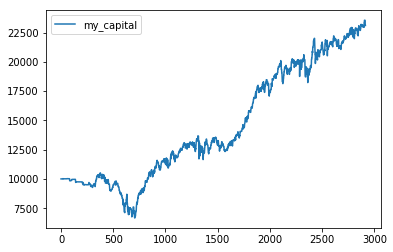

In [283]:
pyplot.plot(growth, label='my_capital')
pyplot.legend()

In [285]:
2916/270

10.8